In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import sys
sys.path.append("../scripts")

import data_preprocessing as dp
import data_cleaning      as dc
import data_visualization as dv
import data_extraction    as de
import task1
import task2

In [2]:
# Load data from postgres database
query = 'select * from xdr_data;'
df = de.load_data_from_postgres(query)

d:\Personal Files\KIAM Notebooks\KIAM Week 2\notebooks\../scripts\data_extraction.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


Data successfully imported from postgres


In [3]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [4]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [5]:
#Split the data for analysis
df = df[['MSISDN/Number', 'TCP UL Retrans. Vol (Bytes)','TCP DL Retrans. Vol (Bytes)', 
        'Avg RTT DL (ms)', 'Avg RTT UL (ms)','Avg Bearer TP DL (kbps)','Avg Bearer TP UL (kbps)','Handset Type']]

In [6]:
df.head()

,MSISDN/Number,TCP UL Retrans. Vol (Bytes),TCP DL Retrans. Vol (Bytes),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Handset Type
0,3.366496e+10,NaN,NaN,42.0,5.0,23.0,44.0,Samsung Galaxy A5 Sm-A520F
1,3.368185e+10,NaN,NaN,65.0,5.0,16.0,26.0,Samsung Galaxy J5 (Sm-J530)
2,3.376063e+10,NaN,NaN,NaN,NaN,6.0,9.0,Samsung Galaxy A8 (2018)
3,3.375034e+10,NaN,NaN,NaN,NaN,44.0,44.0,undefined
4,3.369980e+10,NaN,NaN,NaN,NaN,6.0,9.0,Samsung Sm-G390F


In [7]:
# Check for missing values
dp.check_for_missing_values(df)

MSISDN/Number                   1066
TCP UL Retrans. Vol (Bytes)    96649
TCP DL Retrans. Vol (Bytes)    88146
Avg RTT DL (ms)                27829
Avg RTT UL (ms)                27812
Avg Bearer TP DL (kbps)            1
Avg Bearer TP UL (kbps)            1
Handset Type                     572
dtype: int64

<Axes: xlabel='Avg Bearer TP UL (kbps)', ylabel='Count'>

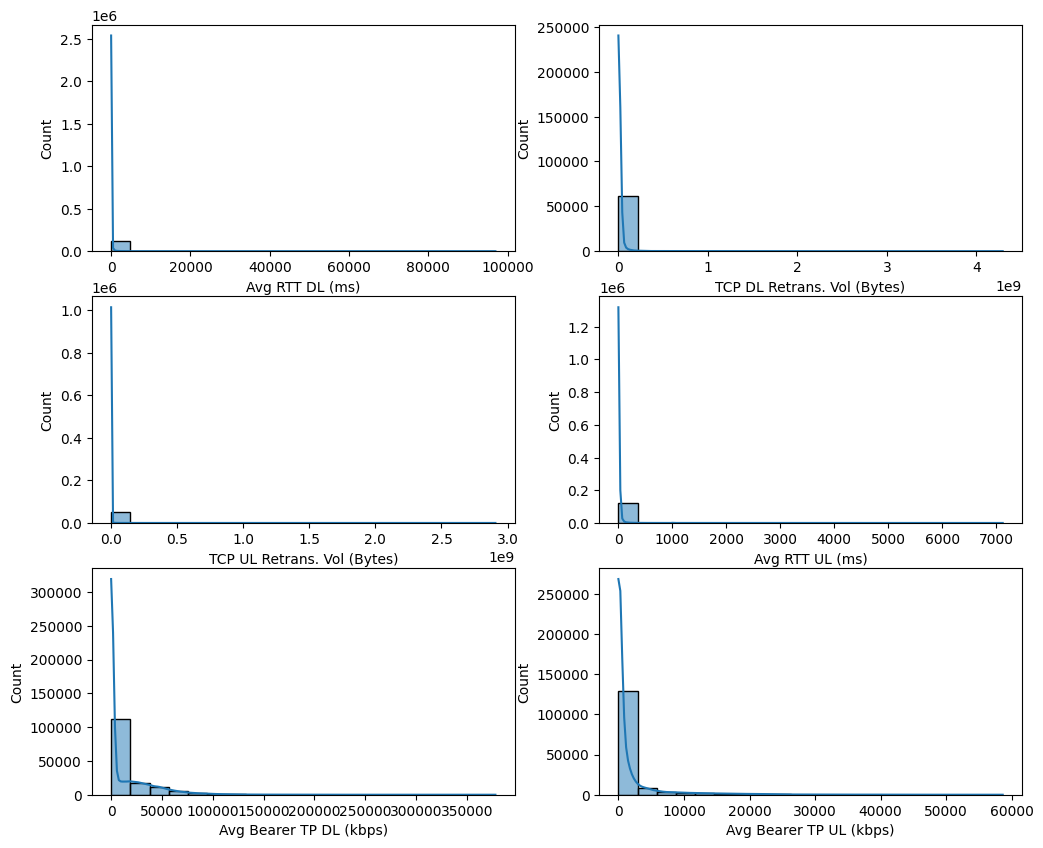

In [8]:
# distribution plot
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
sns.histplot(df['TCP UL Retrans. Vol (Bytes)'], bins=20, kde=True, ax=axes[1, 0])
sns.histplot(df['TCP DL Retrans. Vol (Bytes)'], bins=20, kde=True, ax=axes[0, 1])
sns.histplot(df['Avg RTT DL (ms)'], bins=20, kde=True, ax=axes[0, 0])
sns.histplot(df['Avg RTT UL (ms)'], bins=20, kde=True, ax=axes[1, 1])
sns.histplot(df['Avg Bearer TP DL (kbps)'], bins=20, kde=True, ax=axes[2, 0])
sns.histplot(df['Avg Bearer TP UL (kbps)'], bins=20, kde=True, ax=axes[2, 1])

In [9]:
# The data skewed let's replace it with the median of the corresponding column

numerical_cols = ['TCP UL Retrans. Vol (Bytes)','TCP DL Retrans. Vol (Bytes)', 'Avg RTT DL (ms)',
                   'Avg RTT UL (ms)','Avg Bearer TP DL (kbps)','Avg Bearer TP UL (kbps)']
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())


In [10]:
dp.check_for_missing_values(df)

MSISDN/Number                  1066
TCP UL Retrans. Vol (Bytes)       0
TCP DL Retrans. Vol (Bytes)       0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
Handset Type                    572
dtype: int64

In [11]:
# Drop other missing values
dc.drop_nan_values(df)

Missing rows droped


In [12]:
#Drop duplicates
dc.drop_duplicates(df)

Duplicate values removed


In [18]:
# Aggregate the data for user experience analysis

df['total_TCP'] = df['TCP DL Retrans. Vol (Bytes)'] + df['TCP UL Retrans. Vol (Bytes)']
df['total_RTT'] = df['Avg RTT DL (ms)'] + df['Avg RTT UL (ms)']
df['total_throughput'] = df['Avg Bearer TP DL (kbps)'] + df['Avg Bearer TP UL (kbps)']

df_experience_aggregated = df.groupby(['MSISDN/Number','Handset Type']).agg(total_TCP_vol = ('total_TCP','sum'), total_RTT_vol = ('total_RTT','sum'),
                                                                            total_throughput_speed = ('total_throughput','sum')).reset_index()

In [19]:
df_experience_aggregated.head()

,MSISDN/Number,Handset Type,total_TCP_vol,total_RTT_vol,total_throughput_speed
0,3.360100e+10,Huawei P20 Lite Huawei Nova 3E,589679.5,46.0,76.0
1,3.360100e+10,Apple iPhone 7 (A1778),589679.5,31.0,99.0
2,3.360100e+10,undefined,589679.5,50.0,97.0
3,3.360101e+10,Apple iPhone 5S (A1457),22015.5,84.0,248.0
4,3.360101e+10,Apple iPhone Se (A1723),9960511.5,119.0,56844.0


In [20]:
df_experience_aggregated['total_TCP_vol'].nlargest(10)

66863    8.354209e+09
34126    7.941860e+09
42369    7.374160e+09
94687    6.043978e+09
98219    5.879989e+09
25775    5.593366e+09
51641    5.566929e+09
99935    5.179459e+09
70916    5.174805e+09
31968    5.165857e+09
Name: total_TCP_vol, dtype: float64

In [21]:
df_experience_aggregated['total_TCP_vol'].nsmallest(10)

23473      97.0
6360      128.0
96983     129.0
13547     134.0
2178      143.0
25864     176.0
102204    176.0
105781    177.0
78103     179.0
89401     182.0
Name: total_TCP_vol, dtype: float64

In [24]:
df_experience_aggregated['total_TCP_vol'].mode()

0    589679.5
Name: total_TCP_vol, dtype: float64

In [45]:
# Average Throughput per handset type
df_throughput_average = df_experience_aggregated.groupby('Handset Type')['total_throughput_speed'].mean()

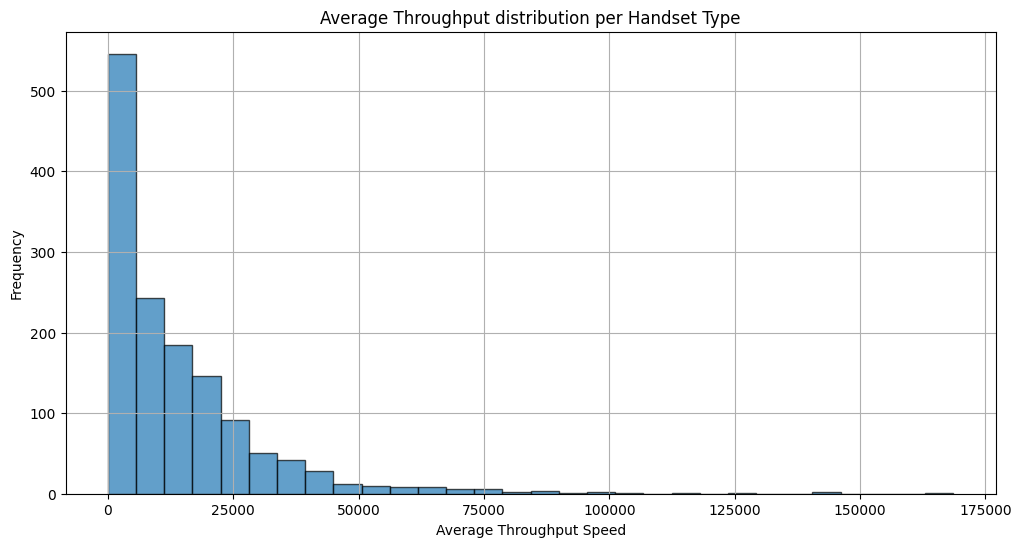

In [46]:
# Plot Average Throughput distribution
plt.figure(figsize=(12, 6))
plt.hist(df_throughput_average, bins=30, edgecolor='k', alpha=0.7)
plt.title('Average Throughput distribution per Handset Type')
plt.xlabel('Average Throughput Speed')
plt.ylabel('Frequency')
plt.grid(True)

**The average throughput distribution per Handset Type shows:**
- Most of the Handset Types experience a throughput speed beetween 0 - 25000 kbps
- The most prevalent throughput range is between 0 - 5000 kbps
- Eventhough larger througput speeds exist they're significantly small

In [47]:
# Aerage TCP volume per handset type
df_TCP_average = df_experience_aggregated.groupby('Handset Type')['total_TCP_vol'].mean()

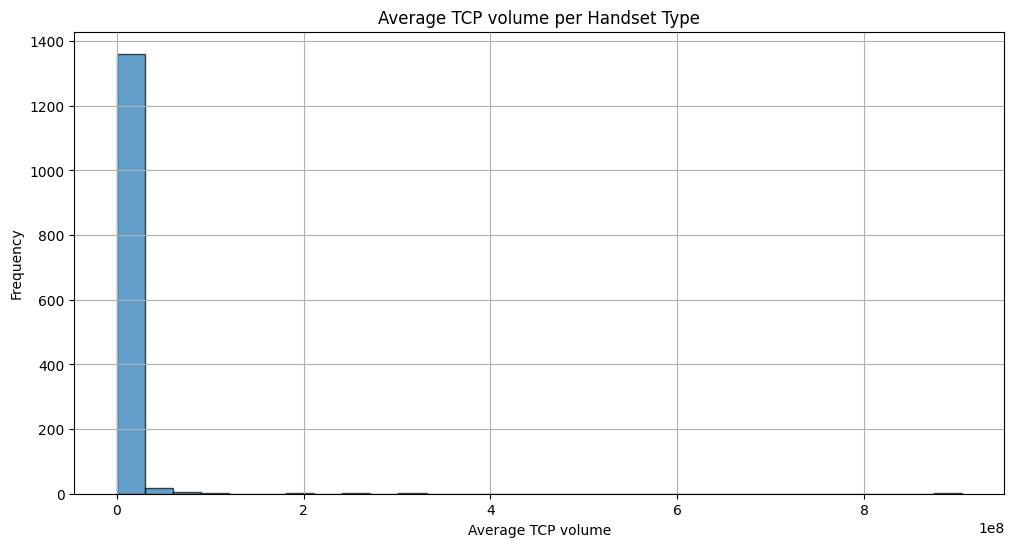

In [48]:
# Plot Average Throughput distribution
plt.figure(figsize=(12, 6))
plt.hist(df_TCP_average, bins=30, edgecolor='k', alpha=0.7)
plt.title('Average TCP volume per Handset Type')
plt.xlabel('Average TCP volume')
plt.ylabel('Frequency')
plt.grid(True)

**The TCP distribution per Handset Type shows:**
- The Average TCP volume for almost all device type is less than 100MB

In [55]:
# K means clustering
#Normalizarion
features = df_experience_aggregated[['total_TCP_vol','total_RTT_vol','total_throughput_speed']]
scaler = StandardScaler()
metrics_scaled = scaler.fit_transform(features)

# K-means Clustering (k=3)
kmeans = KMeans(n_clusters=3, random_state=0)
df_experience_aggregated['cluster'] = kmeans.fit_predict(metrics_scaled)

In [56]:
df_experience_aggregated.head()

,MSISDN/Number,Handset Type,total_TCP_vol,total_RTT_vol,total_throughput_speed,cluster
0,3.360100e+10,Huawei P20 Lite Huawei Nova 3E,589679.5,46.0,76.0,1
1,3.360100e+10,Apple iPhone 7 (A1778),589679.5,31.0,99.0,1
2,3.360100e+10,undefined,589679.5,50.0,97.0,1
3,3.360101e+10,Apple iPhone 5S (A1457),22015.5,84.0,248.0,1
4,3.360101e+10,Apple iPhone Se (A1723),9960511.5,119.0,56844.0,1


In [57]:
#Filter data for cluster 0
cluster_0 = df_experience_aggregated[df_experience_aggregated['cluster'] == 0]

In [59]:
#summary statistics
dp.statistical_summary(cluster_0)

,MSISDN/Number,total_TCP_vol,total_RTT_vol,total_throughput_speed,cluster
count,1.112400e+04,1.112400e+04,11124.000000,11124.000000,11124.0
mean,3.367838e+10,3.726604e+07,402.065534,116256.795397,0.0
std,4.376093e+07,1.273389e+08,1850.096965,65070.230481,0.0
min,3.360108e+10,1.080000e+03,21.000000,3.000000,0.0
25%,3.365887e+10,1.208057e+06,83.000000,75821.000000,0.0
50%,3.366444e+10,4.192818e+06,146.000000,95008.000000,0.0
75%,3.368761e+10,1.782103e+07,315.000000,133729.000000,0.0
max,3.378998e+10,1.460242e+09,96924.000000,902222.000000,0.0
